In [15]:
#Importing keras libraries and packages

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

In [16]:
#step1 Initializing CNN
classifier = Sequential()

# step2 adding 1st Convolution layer and Pooling layer
classifier.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# step3 adding 2nd convolution layer and polling layer
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))


#step4 Flattening the layers
classifier.add(Flatten())

#step5 Full_Connection

classifier.add(Dense(units=32,activation = 'relu'))

classifier.add(Dense(units=64,activation = 'relu'))

classifier.add(Dense(units=128,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=6,activation = 'softmax'))

In [17]:
#step6 Compiling CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [25]:
#step7 Fitting CNN to images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # To rescaling the image in range of [0,1]
                                   shear_range = 0.2, # To randomly shear the images 
                                   zoom_range = 0.2, # To randomly zoom the images
                                   horizontal_flip = True) #  for randomly flipping half of the images horizontally 

test_datagen = ImageDataGenerator(rescale = 1./255)
print("\nTraining the data...\n")
training_set = train_datagen.flow_from_directory('C:/Users/ASUS/Documents/TUGAS AKHIR AI/Dataset/train',
                                                target_size=(64,64),
                                                batch_size=12, #Total no. of batches
                                                class_mode='categorical')

test_set = test_datagen.flow_from_directory('C:/Users/ASUS/Documents/TUGAS AKHIR AI/Dataset/test',
                                            target_size=(64,64),
                                            batch_size=12,
                                            class_mode='categorical')

history=classifier.fit_generator(training_set,
                         steps_per_epoch= 101, # Total training images
                         epochs = 20, # Total no. of epochs
                         validation_data = test_set,
                         validation_steps = 25) # Total testing images


Training the data...

Found 1212 images belonging to 6 classes.
Found 300 images belonging to 6 classes.
Epoch 1/20
101/101 [==============================] - 10s 102ms/step - loss: 0.7094 - accuracy: 0.7129 - val_loss: 0.5318 - val_accuracy: 0.7900
Epoch 2/20
101/101 [==============================] - 10s 95ms/step - loss: 0.6100 - accuracy: 0.7649 - val_loss: 0.4687 - val_accuracy: 0.8033
Epoch 3/20
101/101 [==============================] - 10s 96ms/step - loss: 0.5100 - accuracy: 0.8028 - val_loss: 0.4066 - val_accuracy: 0.8200
Epoch 4/20
101/101 [==============================] - 10s 98ms/step - loss: 0.4799 - accuracy: 0.8193 - val_loss: 0.5381 - val_accuracy: 0.7733
Epoch 5/20
101/101 [==============================] - 10s 96ms/step - loss: 0.4481 - accuracy: 0.8333 - val_loss: 0.5255 - val_accuracy: 0.7767
Epoch 6/20
101/101 [==============================] - 10s 97ms/step - loss: 0.4505 - accuracy: 0.8309 - val_loss: 0.3946 - val_accuracy: 0.8400
Epoch 7/20
101/101 [=========

In [23]:
#step8 saving model 

classifier.save("model.h5")

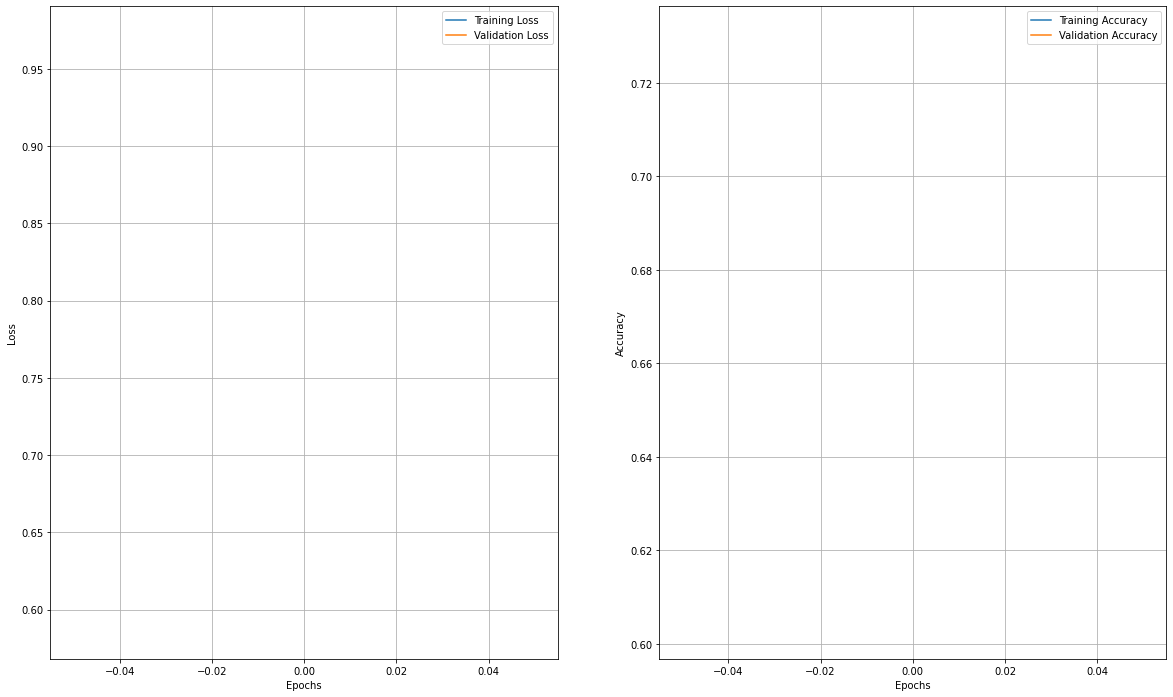

In [24]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()